# Socrata API Project - Nashville.gov Top 500 Monthly Searches

In [26]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

### Q1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire'
response = requests.get(endpoint)

In [ ]:
# Rudy: Can use parameters to pull the same thing
# endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
# params = {
#         "year": "2016",
#         "query_text": "fire"    
#     }
# fires2016 = requests.get(endpoint, params = params)
# fires2016.text

In [3]:
response

<Response [200]>

In [4]:
res_2016_fire = response.json()
res_2016_fire

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [5]:
# Order results by query_count DESC to get the max query_count first
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire&$order=query_count DESC'
response = requests.get(endpoint)
max_fire = response.json()
max_fire

[{'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'December',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_tex

In [6]:
# Limit 1 to get the month with the top query_count for 'fire'
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire&$order=query_count DESC&$limit=1'
response = requests.get(endpoint)
max_fire = response.json()
max_fire

[{'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'}]

#### A1. August had the most searches for 'fire' at 47.

### Q2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [7]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100'
response = requests.get(endpoint)
over100 = response.json()
# over100

In [8]:
times = len(over100)
times
# 1,000 looks too exact... investigating found this:
# https://stackoverflow.com/questions/30941170/why-am-i-limited-to-1-000-rows-on-soda-api-when-i-have-an-app-key
# It defaults to 1,000 records if limit is not specified

1000

In [9]:
# I can specify a limit OR use count:
# https://stackoverflow.com/questions/27823200/is-there-a-socrata-api-method-to-get-the-row-count-of-a-dataset
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$select=count(*)&$where=query_count > 100'
response = requests.get(endpoint)
over100_count = response.json()
over100_count

[{'count': '1262'}]

#### A2. 1,262 is the number of times a query was run more than 100 times in a month.

### Q3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [12]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$select=query_text&$where=query_count > 100 AND query_text=codes'
response = requests.get(endpoint)
over100_codes_count = response.json()
over100_codes_count
# Not working...

{'message': 'Query coordinator error: query.soql.no-such-column; No such column: codes; position: Map(row -> 1, column -> 66, line -> "SELECT `query_text` WHERE `query_count` > 100 AND `query_text` = `codes`\\n                                                                 ^")',
 'errorCode': 'query.soql.no-such-column',
 'data': {'column': 'codes',
  'dataset': 'alpha.6008',
  'position': {'row': 1,
   'column': 66,
   'line': 'SELECT `query_text` WHERE `query_count` > 100 AND `query_text` = `codes`\n                                                                 ^'}}}

In [13]:
# Omitting select:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100 AND query_text=codes'
response = requests.get(endpoint)
over100_codes_count = response.json()
over100_codes_count
# Still thinks codes is a column, maybe the where statement is wrong?

{'message': 'Query coordinator error: query.soql.no-such-column; No such column: codes; position: Map(row -> 1, column -> 112, line -> "SELECT `month_name`, `month`, `year`, `query_count`, `query_text` WHERE `query_count` > 100 AND `query_text` = `codes`\\n                                                                                                               ^")',
 'errorCode': 'query.soql.no-such-column',
 'data': {'column': 'codes',
  'dataset': 'alpha.6008',
  'position': {'row': 1,
   'column': 112,
   'line': 'SELECT `month_name`, `month`, `year`, `query_count`, `query_text` WHERE `query_count` > 100 AND `query_text` = `codes`\n                                                                                                               ^'}}}

In [18]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=codes&query_count > 100'
response = requests.get(endpoint)
over100_codes_count = response.json()
over100_codes_count
# A new error message means I'm getting closer right?!

{'error': True, 'message': 'Unrecognized arguments [query_count > 100]'}

In [20]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=codes&$where=query_count > 100'
response = requests.get(endpoint)
over100_codes_count = response.json()
len(over100_codes_count)
# Hope this is right

56

In [57]:
# How others did it:

# Patrick: $select=count(*)&$where=query_count > 100&query_text=codes'
# Maggie: $query=select count(month_name) where query_count>100 AND query_text="codes"'

#### A3. 56 is the number of times "codes" was searched more than 100 times in a month.

### Q4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [23]:
# Let's check how many records are in this dataset
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$select=count(*)'
response = requests.get(endpoint)
count = response.json()
count

[{'count': '43677'}]

In [24]:
# 43,677 records fit within the max limit parameter of 50k
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'
response = requests.get(endpoint)
all = response.json()
# all

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [27]:
# Same as above but with query_text=maps
# https://stackoverflow.com/questions/59529516/import-all-rows-from-dataset-using-soda-api-python
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=maps&$limit=50000'
response = requests.get(endpoint)
maps = response.json()
df = pd.DataFrame(maps)
print(df.shape)

(82, 5)


In [28]:
df.head()

,month_name,year,query_count,query_text,month
0,January,2014,97,maps,NaN
1,February,2014,140,maps,NaN
2,March,2014,144,maps,NaN
3,April,2014,152,maps,NaN
4,May,2014,119,maps,NaN


In [31]:
# Remove query_text and month columns
df = df.drop(columns=['query_text', 'month'], axis=1)
df.head()

,month_name,year,query_count
0,January,2014,97
1,February,2014,140
2,March,2014,144
3,April,2014,152
4,May,2014,119


In [33]:
# Adding a new col to combine month and year for x-axis
df["monthyear"] = df["month_name"] + df["year"]
df.head()

,month_name,year,query_count,monthyear
0,January,2014,97,January2014
1,February,2014,140,February2014
2,March,2014,144,March2014
3,April,2014,152,April2014
4,May,2014,119,May2014


In [35]:
# Convert query_count to numeric
df["query_count"] = pd.to_numeric(df["query_count"])

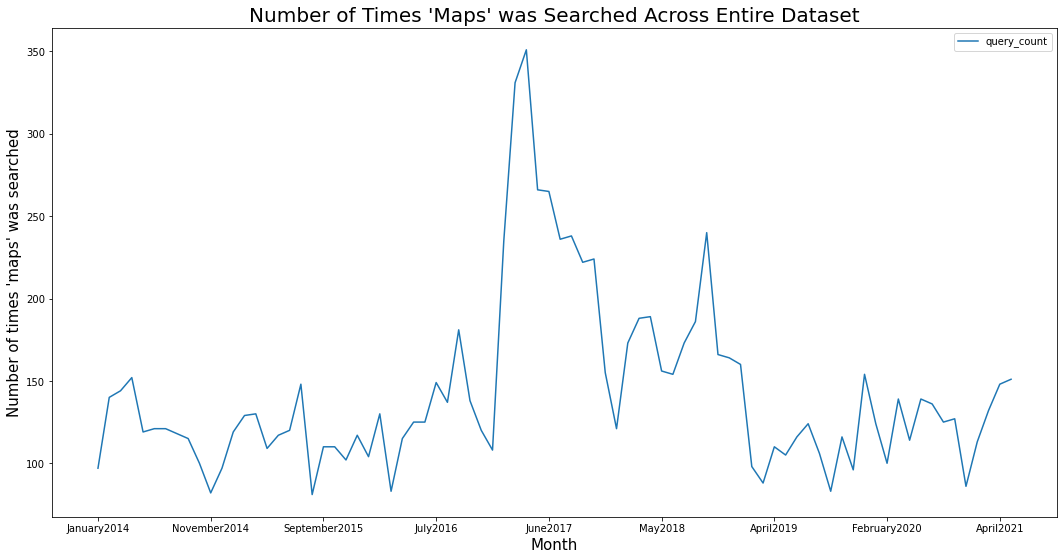

In [56]:
df.plot(x="monthyear", y="query_count", figsize=(18, 9))
plt.title("Number of Times 'Maps' was Searched Across Entire Dataset", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of times 'maps' was searched", fontsize=15)
plt.show()

### Q5. Make an API request to pull back all the data from hubNashville (311) Service Requests (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)

In [58]:
endpoint = 'https://data.nashville.gov/resource/7qhx-rexh.json?$select=count(*)&$limit=1000000'
response = requests.get(endpoint)
service = response.json()
service

[{'count': '936864'}]

#### A5. This dataset has 936,864 rows compared to the 43,677 rows from the Top 500 Monthly Searches data set.

### Q6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.